----

# **Simple Linear Regression**

-----


## **MetaData**

Here's an explanation of each feature in your dataset, presented in a tabular format:

| Feature       | Description                                                                                      |
|---------------|--------------------------------------------------------------------------------------------------|
| `MedInc`      | Median income of households in the block group (in tens of thousands of dollars).                |
| `HouseAge`    | Median age of the houses in the block group (in years).                                           |
| `AveRooms`    | Average number of rooms per household in the block group.                                         |
| `AveBedrms`   | Average number of bedrooms per household in the block group.                                      |
| `Population`  | Total population of the block group.                                                              |
| `AveOccup`    | Average number of occupants per household in the block group.                                     |
| `Latitude`    | Latitude coordinate of the block group's location.                                                |
| `Longitude`   | Longitude coordinate of the block group's location.                                               |
| `HousePrice`  | Median house value in the block group (in hundreds of thousands of dollars).                      |

-----

Yes, Ordinary Least Squares (OLS) regression is a specific method of performing linear regression. While "linear regression" refers to the broader concept of modeling the relationship between dependent and independent variables using a linear equation, OLS is the most common technique used to estimate the parameters of that linear model by minimizing the sum of the squared differences between observed and predicted values.

In summary:

Linear Regression: General term for modeling relationships linearly.
OLS Regression: A specific method within linear regression that minimizes the squared errors.


-----

### **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

### **Load Dataset**

In [2]:
housing = fetch_california_housing()

In [3]:
housing_df = pd.DataFrame(data=housing.data, columns=housing.feature_names)

In [4]:
housing_df['HousePrice'] = housing.target

### **Take a Look at First 5 rows of Dataset**

In [5]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### **Shape of the Dataset**

In [6]:
print(f"This dataset consist of {housing_df.shape[0]} rows and {housing_df.shape[1]} columns.")

This dataset consist of 20640 rows and 9 columns.


### **Detailed Information of Dataset**

In [7]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   HousePrice  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


### **Statistiacl Description of Dataset**

In [8]:
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### **Check Missing Values**

In [9]:
housing_df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
HousePrice,0


### **Pairplot to visualize Relationship Between Features of Dataset**

In [10]:
sns.pairplot(housing_df, height=3)
plt.suptitle('Pairplot of California Housing Dataset', y=1.02, size=15)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

### **Geographic distibution of data points**

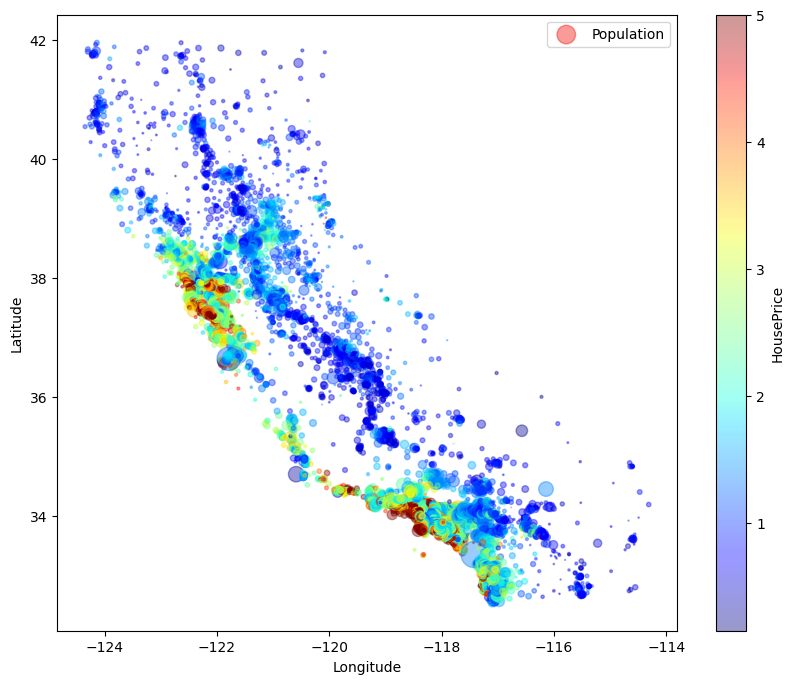

In [11]:
housing_df.plot(
    kind='scatter',
    x='Longitude',
    y='Latitude',
    alpha=0.4,
    s=housing_df['Population']/100,
    label='Population',
    c='HousePrice',
    cmap=plt.get_cmap('jet'),
    colorbar=True,
    figsize=(10,8)
)
plt.legend()
plt.show()

This plot visualizes the geographic distribution of house prices in California. Here's what the plot tells us:

1. **Geographic Location**:
   - The x-axis represents `Longitude`, and the y-axis represents `Latitude`, corresponding to the locations in California. The plot covers a broad range of locations, likely encompassing much of the state.

2. **House Prices**:
   - The color gradient represents `HousePrice`, with the color bar on the right indicating the price levels. Warmer colors (reds and oranges) indicate higher house prices, while cooler colors (blues and greens) represent lower prices.
   - Higher house prices are concentrated along the coast, particularly around the San Francisco Bay Area (roughly between -123 and -122 Longitude and around 37-38 Latitude) and the Los Angeles area (roughly between -119 and -118 Longitude and around 34 Latitude).

3. **Population**:
   - The size of the bubbles represents the `Population` of each block group. Larger bubbles indicate higher population densities.
   - The plot shows that highly populated areas, especially near coastal cities, tend to have higher house prices.

4. **Regional Trends**:
   - The central valley and inland areas (more towards the center of the plot) generally have lower house prices, as indicated by cooler colors.
   - Coastal areas, particularly those near major urban centers like San Francisco, Los Angeles, and possibly San Diego, have higher house prices.

5. **Correlation Between Population and House Prices**:
   - The plot suggests a positive correlation between population density and house prices, particularly in urban coastal regions. Higher population densities in these areas likely drive up demand for housing, resulting in higher prices.

In summary, the plot illustrates the spatial distribution of house prices in California, highlighting that higher prices are typically found in densely populated coastal regions.

## **Correlation Matrix of California Housing Dataset**

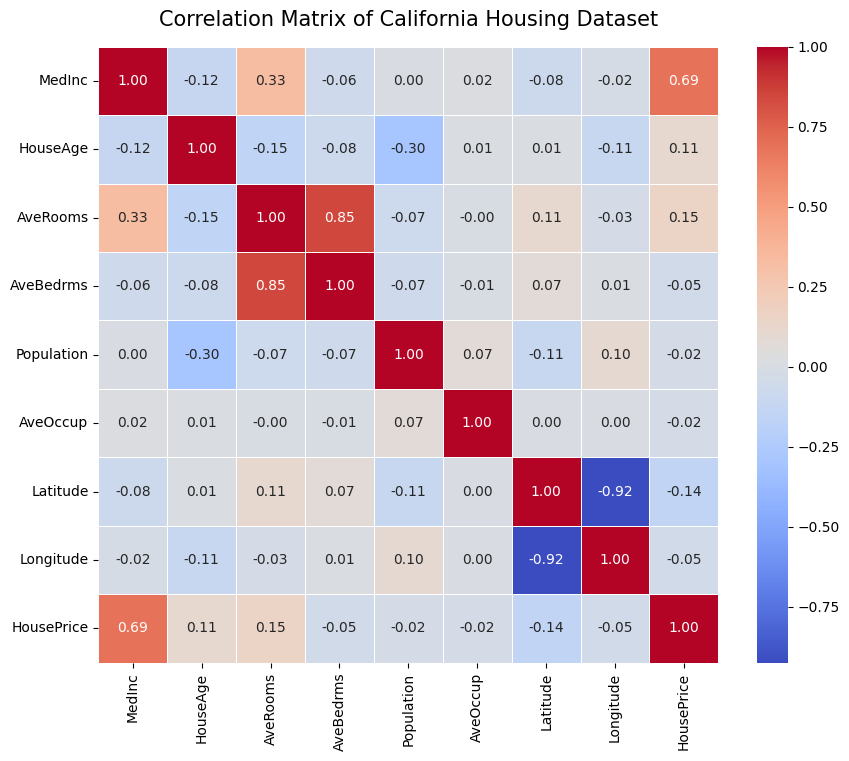

In [12]:
corr = housing_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f',linewidths=0.5)
plt.title('Correlation Matrix of California Housing Dataset', y=1.02, size=15)
plt.show()

This graph is a **correlation matrix** heatmap, which shows the pairwise correlation coefficients between the features of the California Housing dataset. The correlation coefficient values range from -1 to 1, where:

- **1** indicates a perfect positive correlation.
- **-1** indicates a perfect negative correlation.
- **0** indicates no correlation.

Here's what the matrix reveals:

### Key Observations:

1. **`MedInc` (Median Income)**:
   - **Positive Correlation with `HousePrice` (0.69)**: This strong positive correlation suggests that as median income increases, house prices also tend to increase.
   - **Positive Correlation with `AveRooms` (0.33)**: Higher median income is associated with more rooms per house.
   - **Negative Correlation with `HouseAge` (-0.12)**: There is a weak inverse relationship, suggesting areas with newer houses might have higher median incomes.

2. **`HouseAge` (Median Age of Houses)**:
   - **Negative Correlation with `Population` (-0.30)**: Older houses are generally found in less populated areas.
   - **Weak Positive Correlation with `HousePrice` (0.11)**: There is a slight tendency for older houses to have higher prices, but this correlation is weak.

3. **`AveRooms` (Average Number of Rooms)**:
   - **Strong Positive Correlation with `AveBedrms` (0.85)**: Houses with more rooms also tend to have more bedrooms, which is expected.
   - **Weak Positive Correlation with `HousePrice` (0.15)**: More rooms are slightly associated with higher house prices.

4. **`AveBedrms` (Average Number of Bedrooms)**:
   - **Strong Positive Correlation with `AveRooms` (0.85)**: As expected, more rooms generally mean more bedrooms.
   - **Negative Correlation with `HousePrice` (-0.05)**: Interestingly, the number of bedrooms has a slight negative correlation with house prices, though it's very weak.

5. **`Population`**:
   - **Negative Correlation with `HouseAge` (-0.30)**: More populated areas tend to have newer houses.
   - **Very Weak Correlation with `HousePrice` (-0.02)**: Population does not have a strong direct correlation with house prices.

6. **`AveOccup` (Average Occupancy)**:
   - **Weak Correlation with Other Features**: `AveOccup` shows weak correlations with most features, indicating it doesn't have a strong direct relationship with them.

7. **`Latitude` and `Longitude`**:
   - **Strong Negative Correlation between `Latitude` and `Longitude` (-0.92)**: This is expected because latitude and longitude coordinates are inversely related in certain regions.
   - **Negative Correlation with `HousePrice`**: Both `Latitude` (-0.14) and `Longitude` (-0.05) show a weak negative correlation with `HousePrice`, suggesting house prices slightly decrease as you move northward or eastward in California.

### Summary:
- **`MedInc` (Median Income)** is the most strongly correlated feature with `HousePrice`, indicating that income levels are a significant predictor of house prices in this dataset.
- **`AveRooms` and `AveBedrms`** are highly correlated with each other but have a weaker relationship with house prices.
- **Geographical features (`Latitude` and `Longitude`)** show weaker correlations with house prices, suggesting that location within California influences prices, but other factors like income play a more significant role.

### **Absolute Co-relation Values of House Prices**

- The code sorts the absolute values of the correlation coefficients with HousePrice in descending order.

In [13]:
corr['HousePrice'].abs().sort_values(ascending=False)

,HousePrice
HousePrice,1.000000
MedInc,0.688075
AveRooms,0.151948
Latitude,0.144160
HouseAge,0.105623
AveBedrms,0.046701
Longitude,0.045967
Population,0.024650
AveOccup,0.023737


### **Scatter Plot of HousePrice and Medinc**

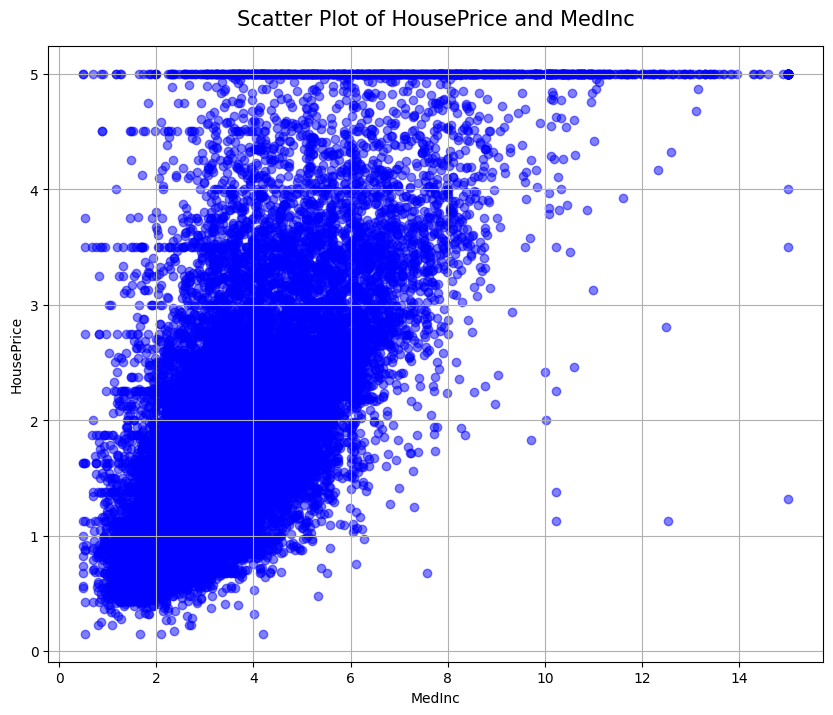

In [15]:
medinc = housing_df['MedInc']
house_price = housing_df['HousePrice']

plt.figure(figsize=(10,8))
plt.scatter(medinc, house_price, alpha=0.5, color='blue')
plt.title('Scatter Plot of HousePrice and MedInc', y=1.02, size=15)
plt.xlabel('MedInc')
plt.ylabel('HousePrice')
plt.grid(True)
plt.show()

This scatter plot shows the relationship between `HousePrice` (y-axis) and `MedInc` (x-axis). Here's what the plot reveals:

1. **Positive Correlation**: The scatter plot suggests a positive correlation between `MedInc` (Median Income) and `HousePrice`. As `MedInc` increases, `HousePrice` tends to increase as well. This is a typical relationship, as higher-income areas often have higher house prices.

2. **Data Distribution**:
   - Most data points are clustered between `MedInc` values of 0 to 10, indicating that the majority of the population has a median income within this range.
   - There are fewer data points for `MedInc` values above 10, suggesting that higher income groups are less common in this dataset.

3. **HousePrice Capping**: The scatter plot shows a horizontal line at `HousePrice` around 5, suggesting that there might be a cap or limit on the house prices at this value in the dataset. This could be due to the data being truncated or capped at a maximum value of 500,000 (since `HousePrice` is likely in hundreds of thousands of dollars).

4. **Outliers**: There are a few outliers where the `MedInc` is high but the `HousePrice` is relatively low or vice versa. These could be specific cases where other factors influence house prices beyond median income.

Overall, the plot indicates a general trend where higher median income is associated with higher house prices, but it also highlights a possible limitation or cap in the house price data.

### **Varience Inflaation Factor**

Here’s a simpler explanation:

1. **Remove House Price**: The code first takes out the column that shows house prices because it’s not a feature we want to analyze.

2. **Make Numbers**: It then makes sure all the other columns are just numbers. If there are any words or weird characters, they turn into empty spots (NaN).

3. **Prepare a Table**: It creates a new table to keep track of each feature (column) and its VIF number.

4. **Calculate VIF**: The VIF number is calculated for each feature. This number tells us how much a feature is related to other features.

5. **Show Results**: Finally, it shows the table with each feature and its VIF number, which helps us see if any features are too similar to each other (a problem called multicollinearity).

In [16]:
1# Assuming housing_df is already defined
housing_df_vif = housing_df.drop('HousePrice', axis=1)
housing_df_vif = housing_df_vif.apply(pd.to_numeric, errors='coerce')

vif_data = pd.DataFrame()
vif_data['Feature'] = housing_df_vif.columns
vif_data['VIF'] = [variance_inflation_factor(housing_df_vif.values, i) for i in range(housing_df_vif.shape[1])]
vif_data

,Feature,VIF
0,MedInc,11.511140
1,HouseAge,7.195917
2,AveRooms,45.993601
3,AveBedrms,43.590314
4,Population,2.935745
5,AveOccup,1.095243
6,Latitude,559.874071
7,Longitude,633.711654


This displays the Variance Inflation Factor (VIF) for each feature in your dataset. VIF is a measure used to detect the presence of multicollinearity in regression models, where multicollinearity occurs when independent variables are highly correlated with each other. High multicollinearity can cause problems in estimating regression coefficients, leading to unreliable results.

### Interpretation of VIF Values:

1. **`MedInc` (VIF = 11.511140):**
   - This value suggests that `MedInc` has moderate multicollinearity with other features. Typically, a VIF above 10 indicates significant multicollinearity.

2. **`HouseAge` (VIF = 7.195917):**
   - `HouseAge` has moderate multicollinearity, but it's not as high as some other features. This suggests that it is somewhat correlated with other variables but may still be useful in a regression model.

3. **`AveRooms` (VIF = 45.993601):**
   - This high VIF indicates strong multicollinearity. `AveRooms` is likely highly correlated with other variables, such as `AveBedrms`.

4. **`AveBedrms` (VIF = 43.593014):**
   - Similar to `AveRooms`, this feature has strong multicollinearity. Since it’s closely related to `AveRooms`, both might provide redundant information in the model.

5. **`Population` (VIF = 2.935745):**
   - `Population` has low multicollinearity, indicating it is not highly correlated with other features and may be reliable in a regression model.

6. **`AveOccup` (VIF = 1.095243):**
   - This very low VIF suggests that `AveOccup` has almost no multicollinearity with other variables, making it a stable feature in the model.

7. **`Latitude` (VIF = 559.874071):**
   - Extremely high VIF for `Latitude` indicates severe multicollinearity, likely with `Longitude`. This makes it problematic in the model because it may not add unique information beyond what is provided by `Longitude`.

8. **`Longitude` (VIF = 633.711654):**
   - The highest VIF value in this list, indicating that `Longitude` is highly collinear with `Latitude`. These two features are strongly related and could distort the model’s coefficients.

### Summary:
- **High VIF values** (e.g., for `Latitude` and `Longitude`) suggest that these features are highly collinear and may need to be removed or combined in some way to avoid issues in your model.
- **Moderate VIF values** (e.g., `MedInc`, `AveRooms`, `AveBedrms`) indicate moderate multicollinearity, which should be investigated further.
- **Low VIF values** (e.g., `Population`, `AveOccup`) suggest these features are not problematic and can be reliably included in the model.

If you find that multicollinearity is a significant issue, you might consider techniques such as:
- **Removing highly collinear features.**
- **Combining correlated features (e.g., `Latitude` and `Longitude`).**
- **Using techniques like Principal Component Analysis (PCA)** to reduce dimensionality and eliminate multicollinearity.

----

- **Let's Remove `Latitude` and `Longitude` Columns to tackle MultiColinearity**

----

In [17]:
housing_df = housing_df.drop(['Latitude','Longitude'],axis=1)

### **Convert Columns to numeric**

- This code converts specified columns in the housing_df DataFrame to numeric types, coercing any errors (e.g., non-numeric values) to NaN. It also converts the 'HousePrice' column to numeric.

In [18]:
cols_to_convert = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
housing_df[cols_to_convert] = housing_df[cols_to_convert].apply(pd.to_numeric, errors='coerce')
housing_df['HousePrice']=pd.to_numeric(housing_df['HousePrice'], errors='coerce')

-----

- This code adds a constant term to the features in housing_df (excluding the 'HousePrice' column) for use in a regression model, and assigns the 'HousePrice' column to the target variable y. This **prepares the data for regression analysis using statsmodels**.

----

In [20]:
X = sm.add_constant(housing_df.drop('HousePrice', axis=1))
y = housing_df['HousePrice']

- This code fits an Ordinary Least Squares (OLS) regression model using the features X and the target variable y. It then prints a summary of the model, which includes statistics such as coefficients, R-squared value, and p-values, helping to evaluate the model's performance and the significance of the predictors.

In [21]:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             HousePrice   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     4032.
Date:                Mon, 02 Sep 2024   Prob (F-statistic):               0.00
Time:                        02:58:50   Log-Likelihood:                -24235.
No. Observations:               20640   AIC:                         4.848e+04
Df Residuals:                   20633   BIC:                         4.854e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4391      0.028    -15.918      0.0

### **Residual Analysis to Validate Linear Regression Assunmptions**

Text(0, 0.5, 'Residuals')

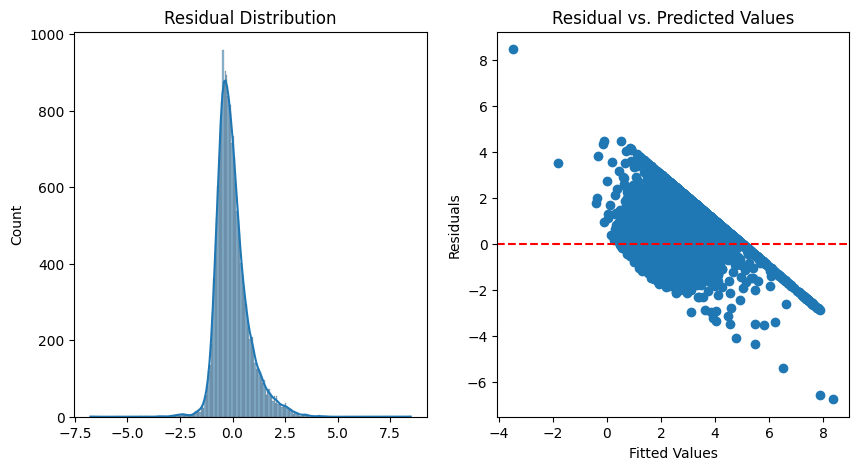

In [23]:
residuals = model.resid

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(residuals, kde=True)
plt.title('Residual Distribution')

plt.subplot(1,2,2)
plt.scatter(model.predict(X), residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual vs. Predicted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

### **Model Params**

- Indicate impact of each feature on House Price.

In [24]:
print('Model Coefficients:')
print(model.params)

Model Coefficients:
const        -0.439093
MedInc        0.536910
HouseAge      0.016503
AveRooms     -0.211740
AveBedrms     0.993730
Population    0.000022
AveOccup     -0.004877
dtype: float64


### **Evaluation Matrix**
- R-squared, MSE

In [25]:
predictions = model.predict(X)
r2 = r2_score(y, predictions)
mse = mean_squared_error(y, predictions)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")

R-squared: 0.5396977345638283
Mean Squared Error: 0.6129156196698703



This model results indicate the following:

- **R-squared**: Approximately 0.54, meaning about 54% of the variance in the house prices is explained by the independent variables in your model. This suggests a moderate fit.

- **Mean Squared Error (MSE)**: Approximately 0.61, which measures the average of the squares of the errors (the difference between predicted and actual values). A lower MSE indicates better model performance, but the interpretation depends on the scale of your target variable (house prices).

Overall, the model explains a fair amount of variance but could potentially be improved.

### **Visualize Predictors using boxplot**

In [31]:
def plot_boxplot(df):
    fig, axes = plt.subplots(1, len(df.columns), figsize=(20, 5))  # Use 'subplots' instead of 'subplot'
    for i, column in enumerate(df.columns):
        df.boxplot(column=column, ax=axes[i])
        axes[i].set_title(column)
    # plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

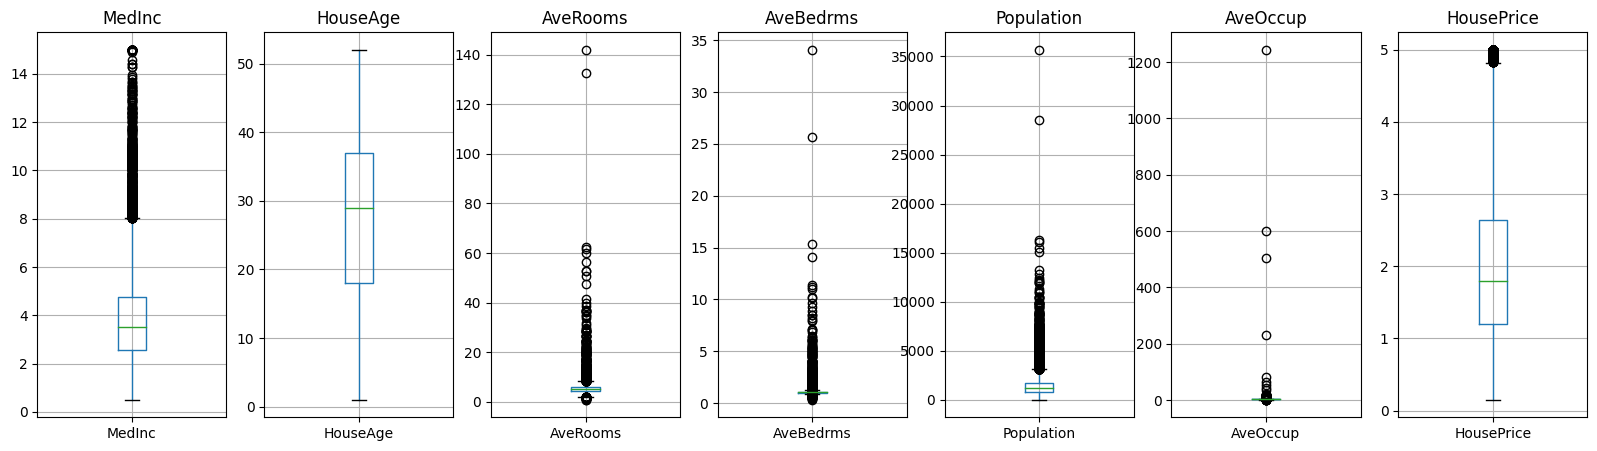

In [32]:
plot_boxplot(housing_df)

### **Define a Funtion that iterates through each column and calculates lower and upper bound based on the IQR and Replaces Outliers with these Bounds**

- This approach preserves dataset Integrity by retaining potentially valueable insights from outliers while reducing their impact on **stastical Analysis and Machine Learning Models**.

- The cleaned dataset **housing_df_new** is returned **without outliers values**.

In [33]:
def remove_outliers(df):
    df_no_outliers = df.copy()
    for column in df.columns:
      Q1 = df[column].quantile(0.25)
      Q3 = df[column].quantile(0.75)
      IQR = Q3 - Q1
      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR
      df_no_outliers[column] = df_no_outliers[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    return df_no_outliers

In [34]:
housing_df_new = remove_outliers(housing_df)

### **Let's Check with box plot the effect of remove_outliers function**

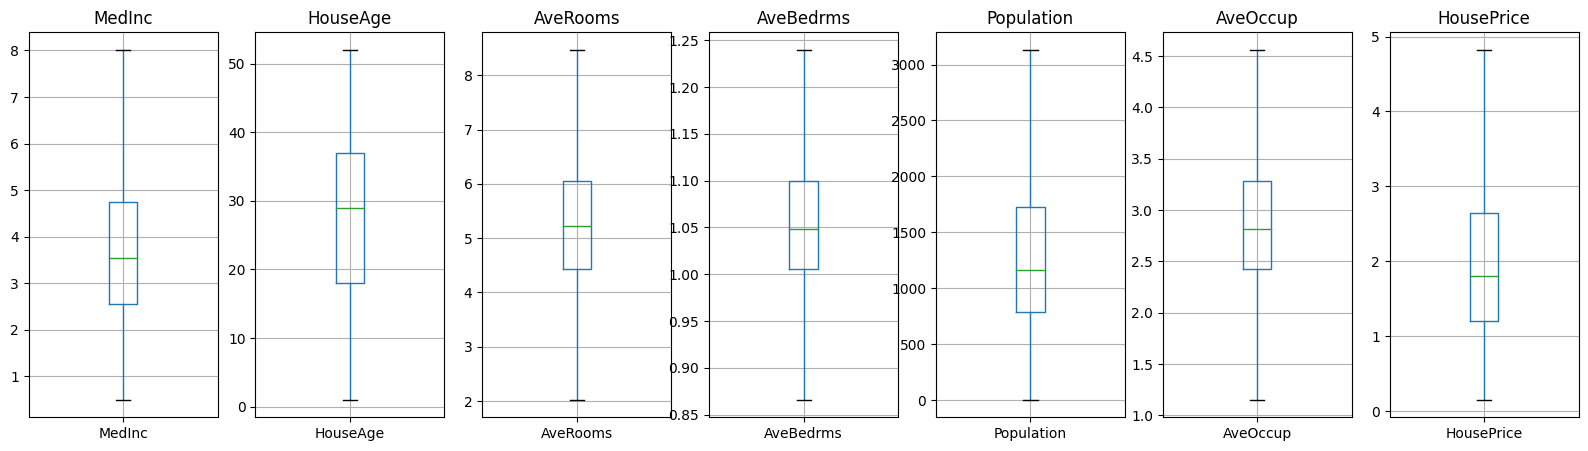

In [35]:
plot_boxplot(housing_df_new)

### **Convert Columns to numeric**

- This code converts specified columns in the housing_df_new DataFrame to numeric types, coercing any errors (e.g., non-numeric values) to NaN. It also converts the 'HousePrice' column to numeric.

In [36]:
cols_to_convert = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
housing_df_new[cols_to_convert] = housing_df_new[cols_to_convert].apply(pd.to_numeric, errors='coerce')
housing_df_new['HousePrice']=pd.to_numeric(housing_df_new['HousePrice'], errors='coerce')

-----

- This code adds a constant term to the features in housing_df_new (excluding the 'HousePrice' column) for use in a regression model, and assigns the 'HousePrice' column to the target variable y. This **prepares the data for regression analysis using statsmodels**.

----

In [37]:
X = sm.add_constant(housing_df_new.drop('HousePrice', axis=1))
y = housing_df_new['HousePrice']

### **Fit linear Regression on housing_df_new**

In [38]:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             HousePrice   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     5556.
Date:                Mon, 02 Sep 2024   Prob (F-statistic):               0.00
Time:                        04:10:00   Log-Likelihood:                -21926.
No. Observations:               20640   AIC:                         4.387e+04
Df Residuals:                   20633   BIC:                         4.392e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0257      0.082    -12.501      0.0

### **Residual Analysis to Validate Linear Regression Assunmptions**

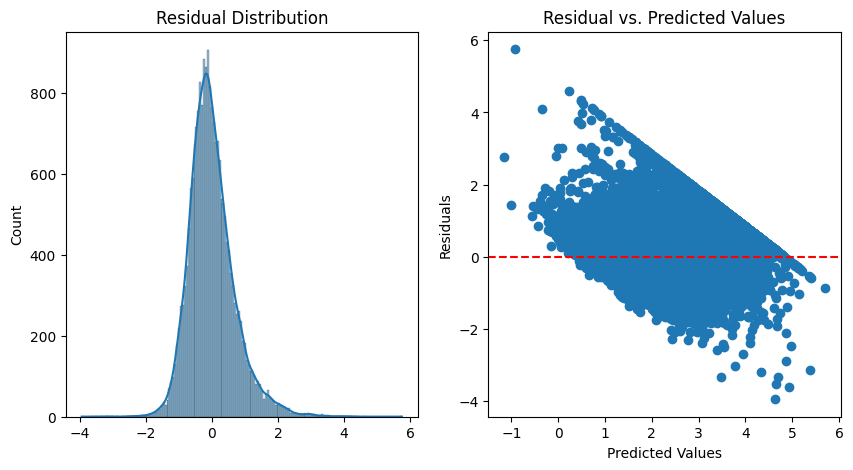

In [40]:
residuals = model.resid

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(residuals, kde=True)
plt.title('Residual Distribution')

plt.subplot(1,2,2)
plt.scatter(model.predict(X), residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

### **Updated Model Params**

- Indicate impact of each feature on House Price.

In [41]:
print('Model Coefficients:')
print(model.params)

Model Coefficients:
const        -1.025744
MedInc        0.634138
HouseAge      0.018696
AveRooms     -0.258632
AveBedrms     2.308808
Population    0.000079
AveOccup     -0.357348
dtype: float64


### **Updated Evaluation Matrix**
- R-squared, MSE

In [42]:
predictions = model.predict(X)
r2 = r2_score(y, predictions)
mse = mean_squared_error(y, predictions)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")

R-squared: 0.617696810976802
Mean Squared Error: 0.49001892235770017
